<style>
  .custom-container {
    width: 1300px;
    margin: 0 auto;
    text-align: center; 
    background: #444; /* Gris oscuro en hexadecimal */
    color: #FBCB0A;
    padding: 20px; /* Agrega espacio alrededor del texto */
    border: 3px solid #FBCB0A; /* Crea un borde alrededor del contenedor #FBCB0A 2F8F9D*/
    border-radius: 10px; /* Añade bordes redondeados */
    font-family: Constantia;
  }
  .custom-container h1 {
    margin-bottom: 20px; /* Espacio inferior adicional para el título */
  }
</style>

<div class="custom-container">
  <h1>Predicción del valor de los futbolistas en 2024</h1>
  <img src="Top_2024.jpg" width="1300">
</div>

<style>
  .custom-heading {
    background: #2F8F9D;
    border: 0;
    color: #FBCB0A;
    font-family: Constantia;
    text-align: center;
    font-weight: bold;
    padding: 10px 0; /* Añadido para espacio interno */
  }
</style>

<h1 class="custom-heading">TABLA DE CONTENIDOS</h1>

<div style="text-align: center;">

  <a href="#librerias-y-carga-de-datos" style="color:#FBCB0A; text-transform: uppercase; font-size: 16px; font-weight: bold;">1. LIBRERÍAS Y CARGA DE DATOS</a>

  <a href="#descripcion-y-analisis-exploratorio-inicial" style="color:#FBCB0A; text-transform: uppercase; font-size: 16px; font-weight: bold;">2. Descripción y Análisis exploratorio Inicial</a>

  <a href="#tranformacion-variables" style="color:#FBCB0A; text-transform: uppercase; font-size: 16px; font-weight: bold;">3. Transformación y creación de variables</a>

  <a href="#seleccion-de-variables" style="color:#FBCB0A; text-transform: uppercase; font-size: 16px; font-weight: bold;">4. Seleccion de Variables</a>

  <a href="#modelos" style="color:#FBCB0A; text-transform: uppercase; font-size: 16px; font-weight: bold;">5. Modelización y ajuste de hiperparámetros</a>

  <a href="#conclusiones" style="color:#FBCB0A; text-transform: uppercase; font-size: 16px; font-weight: bold;">6. Conclusiones</a>
</div>


# <h2 id="librerias-y-carga-de-datos" style="font-weight: bold; color: #2F8F9D;">LIBRERÍAS Y CARGA DE DATOS</h2>

In [2]:
# Carga de librerías
library(Boruta)
library(caret)
library(corrplot)
library(cowplot)
library(doParallel)
library(dplyr)
#library(dummies) no funciona en la últ. ver
library(gam)
library(ggplot2)
library(gridExtra)
library(klaR)
library(lubridate)
library(MASS)
library(mlbench)
library(MXM)
library(naniar)
library(parallel)
#library(plyr) similar a dplyr
library(psych)
library(randomForest)
library(reshape2)
library(RColorBrewer)
library(sas7bdat)
library(VIM)

- ¿Cómo afectan diferentes atributos del jugador (edad, posición, estadísticas de rendimiento, historial de lesiones, etc.) al precio de mercado del futbolista?
- ¿Cuáles son las tendencias de precios en el mercado de futbolistas?
- ¿Es posible prever el precio de mercado de un futbolista en función de ciertos atributos?

In [3]:
# Lectura de datos
df <- read.csv("male_players.csv")
head(df)

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,⋯,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
,<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,231747,/player/231747/kylian-mbappe/240002,24,2,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,⋯,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
2,239085,/player/239085/erling-haaland/240002,24,2,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,⋯,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
3,192985,/player/192985/kevin-de-bruyne/240002,24,2,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,⋯,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
4,158023,/player/158023/lionel-messi/240002,24,2,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,⋯,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
5,165153,/player/165153/karim-benzema/240002,24,2,2023-09-22,K. Benzema,Karim Benzema,"CF, ST",90,90,⋯,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3
6,188545,/player/188545/robert-lewandowski/240002,24,2,2023-09-22,R. Lewandowski,Robert Lewandowski,ST,90,90,⋯,66+3,66+3,66+3,65+3,61+3,61+3,61+3,61+3,61+3,19+3


In [4]:
# Interesan solo para la temporada 2024
# De 180.000 observaciones pasa a 18350 y 109 variables
df <- df[df$fifa_version == 24, ]
write.csv(df, file = "fifa24.csv", row.names = FALSE)

In [5]:
str(df)

'data.frame':	18350 obs. of  109 variables:
 $ player_id                     : int  231747 239085 192985 158023 165153 188545 192119 202126 238794 212831 ...
 $ player_url                    : chr  "/player/231747/kylian-mbappe/240002" "/player/239085/erling-haaland/240002" "/player/192985/kevin-de-bruyne/240002" "/player/158023/lionel-messi/240002" ...
 $ fifa_version                  : num  24 24 24 24 24 24 24 24 24 24 ...
 $ fifa_update                   : num  2 2 2 2 2 2 2 2 2 2 ...
 $ update_as_of                  : chr  "2023-09-22" "2023-09-22" "2023-09-22" "2023-09-22" ...
 $ short_name                    : chr  "K. Mbappé" "E. Haaland" "K. De Bruyne" "L. Messi" ...
 $ long_name                     : chr  "Kylian Mbappé Lottin" "Erling Braut Haaland" "Kevin De Bruyne" "Lionel Andrés Messi Cuccittini" ...
 $ player_positions              : chr  "ST, LW" "ST" "CM, CAM" "CF, CAM" ...
 $ overall                       : int  91 91 91 90 90 90 90 90 89 89 ...
 $ potential          

In [ ]:
# Mi referencia
# https://github.com/sinanbertan/Fifa-21-Player-Value-Prediction-And-EDA/blob/main/FIFA%2021%20PLAYER%20VALUE%20PREDICTION%20AND%20EDA/project.ipynb
# https://www.kaggle.com/code/davidcoxon/football-transfer-market-eda-basic-modelling
# https://github.com/youlasozen/Predicting-the-Market-Value-of-Footballers/blob/main/EDA/EDA_part.ipynb
# https://github.com/imabelaus/Market-Value-Prediction/blob/master/ML_CW3_IMA.R

# <h2 id="descripcion-y-analisis-exploratorio-inicial" style="font-weight: bold; color: #2F8F9D;">DESCRIPCIÓN Y ANÁLISIS EXPLORATORIO INICIAL</h2>

## <h2 style="font-weight: bold; color: #2F8F9D;">CONTENIDO DE LOS DATOS</h2>

| Variable                        | Tipo  | Descripción                                                     |
|---------------------------------|-------|-----------------------------------------------------------------|
| player_id                       | int   | Identificador único del jugador                                 |
| player_url                      | chr   | URL del jugador en la base de datos                             |
| fifa_version                    | num   | Versión del juego FIFA en la que se basa la información         |
| fifa_update                     | num   | Actualización del juego FIFA                                    |
| update_as_of                    | chr   | Fecha de la última actualización de la información              |
| short_name                      | chr   | Apodo del jugador                                               |
| long_name                       | chr   | Nombre completo del jugador                                     |
| player_positions                | chr   | Posiciones en las que juega el jugador                          |
| overall                         | int   | Valor general del jugador en el juego                           |
| potential                       | int   | Potencial del jugador en el juego                               |
| value_eur                       | num   | Valor del jugador en euros                                      |
| wage_eur                        | num   | Salario del jugador en euros                                    |
| age                             | int   | Edad del jugador                                                |
| dob                             | chr   | Fecha de nacimiento del jugador                                 |
| height_cm                       | int   | Altura del jugador en centímetros                               |
| weight_kg                       | int   | Peso del jugador en kilogramos                                  |
| club_team_id                    | int   | Identificador único del equipo al que pertenece el jugador      |
| club_name                       | chr   | Nombre del club al que pertenece el jugador                     |
| league_id                       | num   | Identificador único de la liga en la que juega el jugador       |
| league_name                     | chr   | Nombre de la liga en la que juega el jugador                    |
| league_level                    | int   | Nivel de la liga                                                |
| club_position                   | chr   | Posición del jugador en el club                                 |
| club_jersey_number              | int   | Número de camiseta del jugador en el club                       |
| club_loaned_from                | chr   | Club del que está cedido el jugador (si aplica)                 |
| club_joined_date                | chr   | Fecha de incorporación del jugador al club                      |
| club_contract_valid_until_year  | int   | Año hasta el cual el contrato del jugador es válido             |
| nationality_id                  | int   | Identificador único de la nacionalidad del jugador              |
| nationality_name                | chr   | Nacionalidad del jugador                                        |
| nation_team_id                  | int   | Identificador único del equipo nacional del jugador             |
| nation_position                 | chr   | Posición del jugador en el equipo nacional                      |
| nation_jersey_number            | int   | Número de camiseta del jugador en el equipo nacional            |
| preferred_foot                  | chr   | Pie preferido para jugar del jugador                             |
| weak_foot                       | int   | Nivel de habilidad con el pie menos hábil del jugador            |
| skill_moves                     | int   | Nivel de habilidad en los movimientos del jugador               |
| international_reputation        | int   | Reputación internacional del jugador en el juego                |
| work_rate                       | chr   | Tasa de trabajo del jugador en el juego                         |
| body_type                       | chr   | Tipo de cuerpo del jugador                                      |
| real_face                       | chr   | Indicador de si el jugador tiene su rostro real en el juego     |
| release_clause_eur              | int   | Cláusula de rescisión del jugador en euros                      |
| player_tags                     | chr   | Etiquetas asociadas al jugador                                  |
| player_traits                   | chr   | Rasgos distintivos del jugador                                  |
| pace                            | int   | Calificación de velocidad del jugador                           |
| shooting                        | int   | Calificación de disparo del jugador                             |
| passing                         | int   | Calificación de pase del jugador                                |
| dribbling                       | int   | Calificación de regate del jugador                              |
| defending                       | int   | Calificación de defensa del jugador                             |
| physic                          | int   | Calificación de físico del jugador                              |
| attacking_crossing              | int   | Calificación de cruce ofensivo del jugador                      |
| attacking_finishing             | int   | Calificación de finalización ofensiva del jugador               |
| attacking_heading_accuracy      | int   | Calificación de precisión de cabezazo ofensivo del jugador      |
| attacking_short_passing         | int   | Calificación de pase corto ofensivo del jugador                 |
| attacking_volleys               | int   | Calificación de voleas del jugador                              |
| skill_dribbling                 | int   | Calificación de habilidad de regate del jugador                 |
| skill_curve                     | int   | Calificación de tiro curvado del jugador                        |
| skill_fk_accuracy               | int   | Calificación de precisión de tiros libres del jugador           |
| skill_long_passing              | int   | Calificación de pase largo del jugador                          |
| skill_ball_control              | int   | Calificación de control de balón del jugador                    |
| movement_acceleration           | int   | Calificación de aceleración de movimiento del jugador           |
| movement_sprint_speed           | int   | Calificación de velocidad de sprint del jugador                 |
| movement_agility                | int   | Calificación de agilidad de movimiento del jugador              |
| movement_reactions              | int   | Calificación de reacciones del jugador                          |
| movement_balance                | int   | Calificación de equilibrio del jugador                          |
| power_shot_power                | int   | Calificación de potencia de tiro del jugador                    |
| power_jumping                   | int   | Calificación de salto del jugador                               |
| power_stamina                   | int   | Calificación de resistencia del jugador                         |
| power_strength                  | int   | Calificación de fuerza del jugador                              |
| power_long_shots                | int   | Calificación de tiros de larga distancia del jugador            |
| mentality_aggression            | int   | Calificación de agresividad del jugador                         |
| mentality_interceptions         | int   | Calificación de intercepciones del jugador                      |
| mentality_positioning           | int   | Calificación de posicionamiento del jugador                     |
| mentality_vision                | int   | Calificación de visión del jugador                              |
| mentality_penalties             | int   | Calificación de lanzamientos de penalti del jugador             |
| mentality_composure             | int   | Calificación de compostura del jugador                          |
| defending_marking_awareness     | int   | Calificación de marcaje y conciencia defensiva del jugador      |
| defending_standing_tackle       | int   | Calificación de entrada del jugador                             |
| defending_sliding_tackle        | int   | Calificación de entrada deslizando del jugador                  |
| goalkeeping_diving              | int   | Calificación de paradas lanzándose del portero                  |
| goalkeeping_handling            | int   | Calificación de manejo de balón del portero                     |
| goalkeeping_kicking             | int   | Calificación de golpeo de balón del portero                     |
| goalkeeping_positioning         | int   | Calificación de posicionamiento del portero                     |
| goalkeeping_reflexes            | int   | Calificación de reflejos del portero                            |
| goalkeeping_speed               | int   | Calificación de velocidad del portero                           |
| ls                              | chr   | Calificación de delantero izquierdo                             |
| st                              | chr   | Calificación de delantero centro                                |
| rs                              | chr   | Calificación de delantero derecho                               |
| lw                              | chr   | Calificación de extremo izquierdo                               |
| lf                              | chr   | Calificación de extremo izquierdo                               |
| cf                              | chr   | Calificación de delantero centro                                |
| rf                              | chr   | Calificación de delantero derecho                               |
| rw                              | chr   | Calificación de extremo derecho                                 |
| lam                             | chr   | Calificación de mediocampista ofensivo izquierdo                |
| cam                             | chr   | Calificación de mediocampista ofensivo central                   |
| ram                             | chr   | Calificación de mediocampista ofensivo derecho                   |
| lm                              | chr   | Calificación de centrocampista izquierdo                         |
| lcm                             | chr   | Calificación de centrocampista central izquierdo                 |
| cm                              | chr   | Calificación de centrocampista central                           |
| rcm                             | chr   | Calificación de centrocampista central derecho                   |
| rm                              | chr   | Calificación de centrocampista derecho                           |
| lwb                             | chr   | Calificación de defensa lateral izquierdo                        |
| rwb                             | chr   | Calificación de defensa lateral derecho                          |
| lb                              | chr   | Calificación de lateral izquierdo                                |
| lcb                             | chr   | Calificación de defensa central izquierdo                        |
| cb                              | chr   | Calificación de defensa central                                  |
| rcb                             | chr   | Calificación de defensa central derecho                          |
| rb                              | chr   | Calificación de lateral derecho                                  |


<p style="font-weight: bold;"> Jugadores del FIFA 24. </p>

### Descripción del conjunto de datos

- **Número de variables:** 109
- **Número de filas:** 18.350

### Está organizado en los siguientes grupos:

1. **Datos personales.** Incluye información específica sobre el jugador, como su identificación, nombre, características físicas, habilidades y posiciones en el campo de juego.
   
2. **Datos del contrato.** Contiene detalles relacionados con el contrato del jugador, como su valor, salario, cláusula de rescisión, fecha de inicio y fin de contrato.
   
3. **Datos de la selección nacional.** Información sobre la participación del jugador en equipos nacionales, como su nacionalidad, equipo nacional, posición en el equipo y número de camiseta.
   
4. **Cualidades técnicas.** Abarca las diversas habilidades y atributos del jugador, tanto físicos como técnicos, que influyen en su rendimiento en el campo, como velocidad, disparo, pase, regate, defensa y habilidades de portero.

## <h2 style="font-weight: bold; color: #2F8F9D;">ANÁLISIS EXPLORATORIO INICIAL</h2>


In [6]:
# 46 variables con texto (entre las que podría haber ordinales y fechas), 58 enteras (algunas de ellas son ID) y 5 numericas
tipos_col <- sapply(df, class)
table(tipos_col)

tipos_col
character   integer   numeric 
       46        58         5 

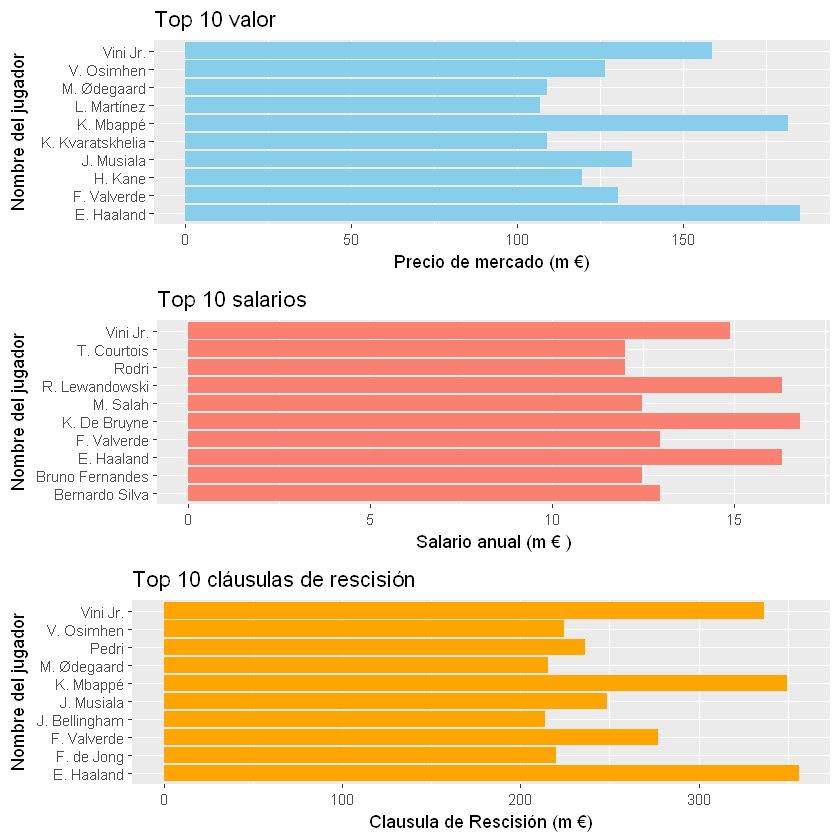

In [7]:
top_10 <- df[order(-df$value_eur), c("short_name", "value_eur")][1:10, ]
top_10$value_eur_millions <- top_10$value_eur / 1e6

top_wage <- df[order(-df$wage_eur), c("short_name", "wage_eur")][1:10, ]
top_wage$wage_eur_millions <- 48 * top_wage$wage_eur / 1e6

top_release_clause <- df[order(-df$release_clause_eur), c("short_name", "release_clause_eur")][1:10, ]
top_release_clause$release_clause_eur_millions <- top_release_clause$release_clause_eur / 1e6

plot_value <- ggplot(top_10, aes(x = short_name, y = value_eur_millions)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  coord_flip() +  
  labs(x = "Nombre del jugador", y = "Precio de mercado (m €)", title = "Top 10 valor") +
  scale_y_continuous(labels = scales::comma)  

plot_wage <- ggplot(top_wage, aes(x = short_name, y = wage_eur_millions)) +
  geom_bar(stat = "identity", fill = "salmon") +
  coord_flip() +  
  labs(x = "Nombre del jugador", y = "Salario anual (m € )", title = "Top 10 salarios") +
  scale_y_continuous(labels = scales::comma) 

plot_release_clause <- ggplot(top_release_clause, aes(x = short_name, y = release_clause_eur_millions)) +
  geom_bar(stat = "identity", fill = "orange") +
  coord_flip() +  
  labs(x = "Nombre del jugador", y = "Clausula de Rescisión (m €)", title = "Top 10 cláusulas de rescisión") +
  scale_y_continuous(labels = scales::comma)

grid.arrange(plot_value, plot_wage, plot_release_clause, nrow = 3)


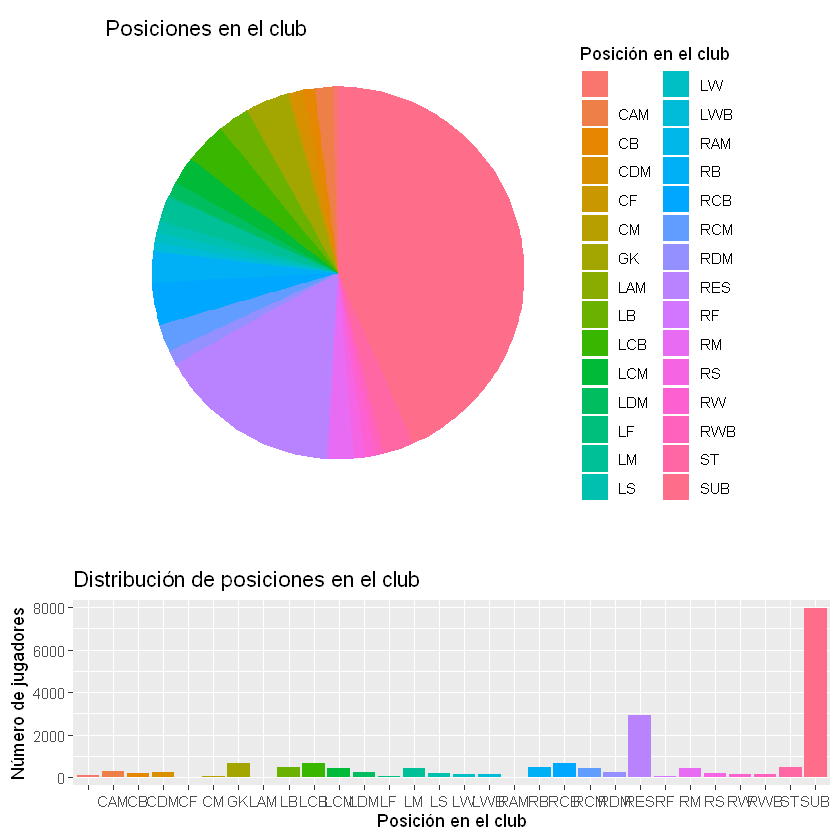

In [8]:
plot_pie <- ggplot(df, aes(x = "", fill = club_position)) +
  geom_bar(width = 1) +
  coord_polar(theta = "y") +
  labs(fill = "Posición en el club") +
  theme_void() +
  ggtitle("Posiciones en el club")

plot_bar <- ggplot(df, aes(x = club_position, fill = club_position)) +
  geom_bar() +
  labs(x = "Posición en el club", y = "Número de jugadores", fill = "Posición en el club") +
  ggtitle("Distribución de posiciones en el club") +
  theme(legend.position = "none") 

combined_plot <- plot_grid(plot_pie, plot_bar, align = "h", nrow = 2, rel_heights = c(4, 2))
combined_plot

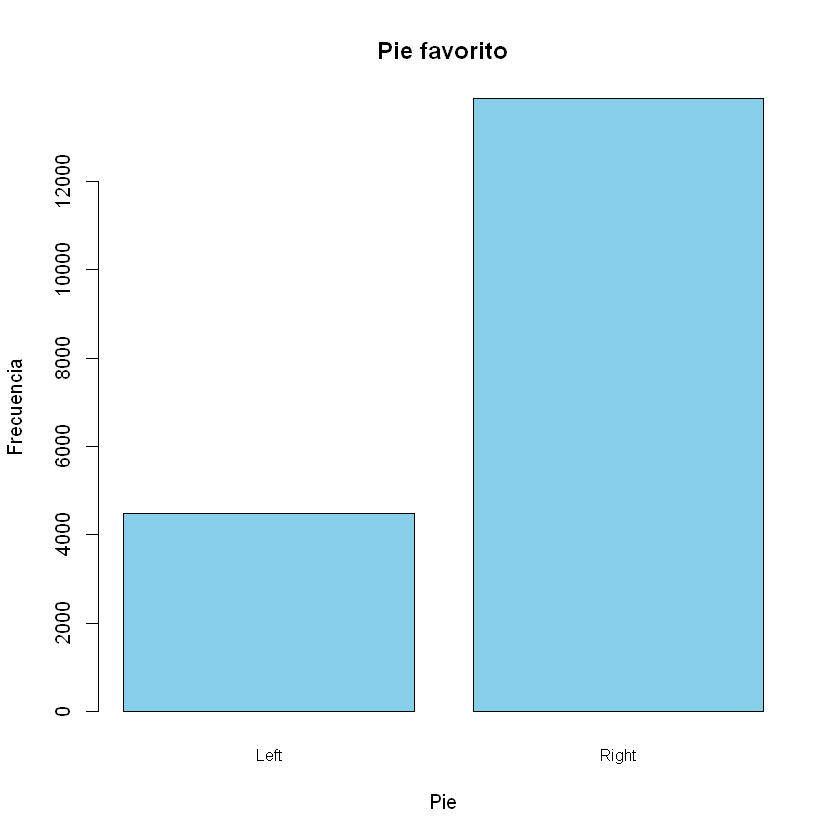

In [9]:
df$preferred_foot %>% table() %>% barplot(main = "Pie favorito", xlab = "Pie", ylab = "Frecuencia", col = "skyblue", cex.names = 0.8)

https://www.kaggle.com/code/beridzeg45/transfer-fee-prediction-xgboost-regressor

# <h2 id="transformacion-variables" style="font-weight: bold; color: #2F8F9D;">TRANSFORMACIÓN Y CREACIÓN DE VARIABLES:</h2>

In [10]:
# Nombres de las columnas como una lista
nombres_col <- names(df)
aux_ <- paste(nombres_col, collapse = ", ")
cat(aux_)

# Alternativa si quiero todas en lista para copiar/pegar - no sale en 1 línea
# dput(nombres_col)

player_id, player_url, fifa_version, fifa_update, update_as_of, short_name, long_name, player_positions, overall, potential, value_eur, wage_eur, age, dob, height_cm, weight_kg, club_team_id, club_name, league_id, league_name, league_level, club_position, club_jersey_number, club_loaned_from, club_joined_date, club_contract_valid_until_year, nationality_id, nationality_name, nation_team_id, nation_position, nation_jersey_number, preferred_foot, weak_foot, skill_moves, international_reputation, work_rate, body_type, real_face, release_clause_eur, player_tags, player_traits, pace, shooting, passing, dribbling, defending, physic, attacking_crossing, attacking_finishing, attacking_heading_accuracy, attacking_short_passing, attacking_volleys, skill_dribbling, skill_curve, skill_fk_accuracy, skill_long_passing, skill_ball_control, movement_acceleration, movement_sprint_speed, movement_agility, movement_reactions, movement_balance, power_shot_power, power_jumping, power_stamina, power_strengt

In [11]:
# Otras columnas que no son útiles o redundantes
# Las de identificación del jugador
# Las de nombres e IDs de liga, por estar categorizadas por Tier
# Las fechas como la de nacimiento por estar la edad para la temporada 24
# Las del número de camiseta tanto en club como selección (los jugadores más valiosos suelen ser atacantes que llevan el 7, 9 o 10)
# Player_position se elimina porque tiene varias y suele jugar en la misma en club_position
del_player <- c("player_id", "player_url", "dob", "short_name", "long_name", "body_type", "player_positions")
del_player_club <- c("club_name", "club_team_id", "league_name", "league_id", "club_jersey_number", "club_loaned_from")
del_player_sel <- c("nationality_name", "nation_position", "nation_jersey_number", "nationality_id")
del_other <- c("fifa_version", "fifa_update", "update_as_of", "real_face", "player_tags")
del_col <- c(del_player, del_player_club, del_player_sel, del_other)

# Tras este primer filtro, quedan 87 variables antes de hacer dummies
df <- df[, !(names(df) %in% del_col)]

#str(df)

In [12]:
# Puesto que la calificación de las posiciones va implícita en otras columnas y para simplificiar al haber más de 100, se eliminan las siguientes
pos <- c("ls", "st", "rs", "lw", "lf", "cf", "rf", "rw", "lam", "cam", "ram", "lm", "lcm", "cm", "rcm", "rm", "lwb", "rwb", "lb", "lcb", "cb", "rcb", "rb", "ldm", "cdm", "rdm", "gk")
df <- df[, !(names(df) %in% pos)]

# 60 variables antes de la creación de dummies
#str(df)

In [13]:
# Nombres de las columnas restantes como una lista
nombres_col <- names(df)
aux_ <- paste(nombres_col, collapse = ", ")
cat(aux_)

#dput(nombres_col)

overall, potential, value_eur, wage_eur, age, height_cm, weight_kg, league_level, club_position, club_joined_date, club_contract_valid_until_year, nation_team_id, preferred_foot, weak_foot, skill_moves, international_reputation, work_rate, release_clause_eur, player_traits, pace, shooting, passing, dribbling, defending, physic, attacking_crossing, attacking_finishing, attacking_heading_accuracy, attacking_short_passing, attacking_volleys, skill_dribbling, skill_curve, skill_fk_accuracy, skill_long_passing, skill_ball_control, movement_acceleration, movement_sprint_speed, movement_agility, movement_reactions, movement_balance, power_shot_power, power_jumping, power_stamina, power_strength, power_long_shots, mentality_aggression, mentality_interceptions, mentality_positioning, mentality_vision, mentality_penalties, mentality_composure, defending_marking_awareness, defending_standing_tackle, defending_sliding_tackle, goalkeeping_diving, goalkeeping_handling, goalkeeping_kicking, goalkeepi

In [14]:
# Creación de variables dummies para el pie
# Pie Left and Rigth
dummies <- model.matrix(~ preferred_foot - 1, data = df)
colnames(dummies) <- gsub("preferred_foot", "", colnames(dummies))
df <- cbind(df, dummies)

# En el caso de jugadores ambidiestros (salen 0, se elimina por no ser representativa <20)
df$ambidextrous <- as.numeric(df$preferred_foot == "Left" & df$preferred_foot == "Right")

if (sum(df$ambidextrous) < 20) {
  df <- df[, !colnames(df) %in% "ambidextrous"]
}

In [15]:
# Las posiciones favoritas del juegador pueden ser varias, mientras que club_position y selection_position son unicas
# Se elige club_position porque se juegan muchos más partidos con el club que con la selección
unique_player <- unique(unlist(strsplit(df$club_position, ", ")))
print(unique_player)

 [1] "LW"  "ST"  "SUB" "RF"  "RS"  "GK"  "RCM" "LCB" "LM"  "RW"  "RDM" "CAM"
[13] "LCM" "LS"  "RCB" "RB"  "RES" "CDM" "RM"  "LB"  "LF"  "CB"  "CM"  "LDM"
[25] "CF"  "LAM" "RWB" "LWB" "RAM"


In [16]:
categories <- c("Portero", "Defensa", "Medio", "Delantero")

# Reduce las categorías a portero, defensa, medio y delantero
assign_category <- function(position) {
  if (position %in% c("GK")) {
    return("Portero")
  } else if (position %in% c("CB", "LCB", "RCB", "LB", "RB", "LWB", "RWB")) {
    return("Defensa")
  } else if (position %in% c("CDM", "CM", "LCM", "RCM", "CAM", "LM", "RM", "LAM", "RAM", "LDM", "RDM")) {
    return("Medio")
  } else {
    return("Delantero")
  }
}

df$category <- sapply(df$club_position, assign_category)
#head(df)

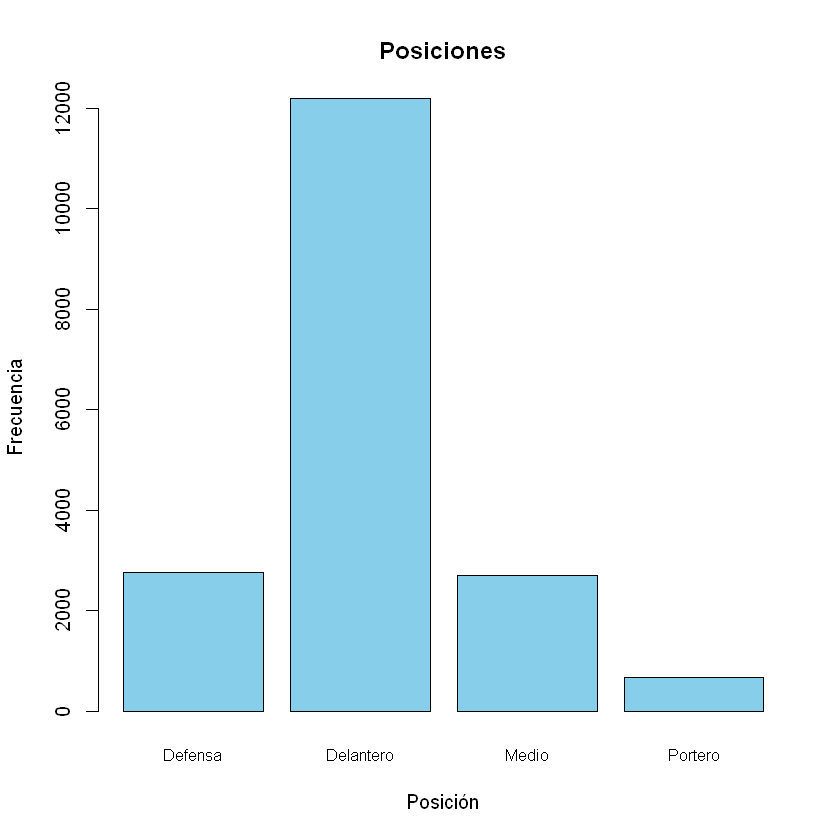

In [17]:
df$category %>% table() %>% barplot(main = "Posiciones", xlab = "Posición", ylab = "Frecuencia", col = "skyblue", cex.names = 0.8)

In [18]:
# Dummies para la posición
# Crear variables dummy para la columna category
dummies <- model.matrix(~ category - 1, data = df)

# Elimina la columna category
# df <- df[, !colnames(df) %in% "category"]

colnames(dummies) <- gsub("category", "", colnames(dummies))
df <- cbind(df, dummies)

In [19]:
# Mapa de calor con los missing
df_long <- melt(is.na(df))

p <- ggplot(data = df_long, aes(x = Var2, y = Var1, fill = value)) +
  geom_tile() +
  scale_fill_manual(values = c("TRUE" = "black", "FALSE" = "skyblue"), guide = FALSE) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(x = "Variables", y = "Filas", title = "Mapa de Calor de Valores Nulos")

ggsave("mapa_de_calor.png", plot = p, width = 10, height = 6)


Warning message:
"The `guide` argument in `scale_*()` cannot be `FALSE`. This was deprecated in
ggplot2 3.3.4.
ℹ Please use "none" instead."


In [20]:
# Hay varias columnas char que son de tipo fecha (nacimiento, inicio y fin de contrato)

# Se especifica el formato de fecha deseado en las columnas necesarias
df$club_joined_date <- as.Date(df$club_joined_date)

# Calcular el año de inicio de contrato 
df$club_joined_year <- format(df$club_joined_date, "%Y")

# Años restantes de contrato y los que lleva en el club
year_current <- 2024
df$years_remaining <- df$club_contract_valid_until_year - year_current 
df$years_in_club <- year_current - as.numeric(df$club_joined_year)

# Se eliminan para evitar datos innecesarios
col_del <- c("club_joined_year", "club_contract_valid_until_year", "club_joined_date")
df <- df[, !names(df) %in% col_del, drop = FALSE]

In [21]:
# Conversión a millones de € 
df$value_eur <- df$value_eur / 1000000
df$wage_eur <- (df$wage_eur * 48) / 1000000 # Se pasa a salario anual suponiendo que el año tiene 48 semanas
df$release_clause_eur <- df$release_clause_eur / 1000000

# Se renombran las columnas
names(df)[names(df) == "value_eur"] <- "value_eur_m"
names(df)[names(df) == "wage_eur"] <- "wage_eur_m"
names(df)[names(df) == "release_clause_eur"] <- "release_clause_eur_m"

# Top 10 de salarios (convertidos de semanal a anual, sin incluir bonus)
top_10_wage <- df[order(-df$wage_eur), ][1:10, ]
top_10_wage


,overall,potential,value_eur_m,wage_eur_m,age,height_cm,weight_kg,league_level,club_position,nation_team_id,⋯,goalkeeping_speed,Left,Right,category,Defensa,Delantero,Medio,Portero,years_remaining,years_in_club
,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<int>,⋯,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,91,91,103.0,16.80,32,181,75,1,SUB,1325,⋯,NA,0,1,Delantero,0,1,0,0,1,9
2,91,94,185.0,16.32,22,195,94,1,ST,1352,⋯,NA,1,0,Delantero,0,1,0,0,3,2
6,90,90,58.0,16.32,34,185,81,1,ST,1353,⋯,NA,0,1,Delantero,0,1,0,0,2,2
9,89,94,158.5,14.88,22,176,73,1,SUB,NA,⋯,NA,0,1,Delantero,0,1,0,0,1,6
18,88,92,130.5,12.96,24,182,78,1,RCM,NA,⋯,NA,0,1,Medio,0,0,1,0,3,8
25,88,88,91.5,12.96,28,173,64,1,SUB,1354,⋯,NA,1,0,Delantero,0,1,0,0,2,7
17,89,89,85.5,12.48,31,175,71,1,RW,NA,⋯,NA,1,0,Delantero,0,1,0,0,1,7
24,88,88,92.0,12.48,28,179,69,1,CAM,1354,⋯,NA,0,1,Medio,0,0,1,0,2,4
7,90,90,63.0,12.00,31,199,96,1,SUB,1325,⋯,46,1,0,Delantero,0,1,0,0,2,6


In [22]:
# Hacer dummies por cada seleccion es demasiado complejo y podría no aportar nada
# Se asigna un 1 alos jugadores que van con su selección y 0 a los que no
df$is_internacional <- ifelse(!is.na(df$nation_team_id), 1, 0)

In [23]:
# Comprueba duplicados
new_ <- nrow(unique(df))
pre_ <- nrow(df)
cat("Filas duplicadas:", pre_- new_)

# Elimina duplicados si los hubiera
df <- df %>%
  distinct()

Filas duplicadas: 0

In [24]:
# Guardar el DataFrame como un archivo CSV
# Contiene las variables dummies y las transformadas
write.csv(df, "1_datos_con_dummies_y_missings_bruto.csv", row.names = FALSE)

In [102]:
# Número y % de valores faltantes
total_filas <- nrow(df)
missing_por_columna <- colSums(is.na(df))
porcentaje_missing <- (missing_por_columna / total_filas) * 100

resultado <- data.frame(
  Columna = names(df),
  Missing = missing_por_columna,
  Porcentaje_Missing = porcentaje_missing
)

# Filtra solo columnas con valores faltantes
resultado_filtrado <- resultado[resultado$Missing > 0, ]
print(resultado_filtrado[, c("Missing", "Porcentaje_Missing")])

# Muestra el nombre de las columnas como una lista para facilitar el pegado
nombres_col <- rownames(resultado_filtrado)
aux_ <- paste(nombres_col, collapse = ",")
cat("\nNombres: ", aux_)

                     Missing Porcentaje_Missing
value_eur_m              100          0.5449591
wage_eur_m                87          0.4741144
league_level              87          0.4741144
release_clause_eur_m    1280          6.9754768
pace                    2045         11.1444142
shooting                2045         11.1444142
passing                 2045         11.1444142
dribbling               2045         11.1444142
defending               2045         11.1444142
physic                  2045         11.1444142
goalkeeping_speed      16305         88.8555858
years_remaining           87          0.4741144
years_in_club           1267          6.9046322

Nombres:  value_eur_m,wage_eur_m,league_level,release_clause_eur_m,pace,shooting,passing,dribbling,defending,physic,goalkeeping_speed,years_remaining,years_in_club

In [107]:
#df <- subset(df, select = -c(goalkeeping_speed))
write.csv(df, "1_datos_con_dummies_y_missings_bruto.csv", row.names = FALSE)

In [42]:
# Los missing están en porteros y delanteros
df_portero_pace <- subset(df, category == "Portero" & !is.na(pace))
df_portero_pace
# pace,shooting,passing,dribbling,defending,physic
# La mayoría de missing están en los porteros

Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"


overall,potential,value_eur_m,wage_eur_m,age,height_cm,weight_kg,league_level,club_position,preferred_foot,⋯,Left,Right,category,Defensa,Delantero,Medio,Portero,years_remaining,years_in_club,is_internacional
<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


In [108]:
# Crear un nuevo dataframe sin filas con valores faltantes
df_new <- df[complete.cases(df), ]
str(df_new)
write.csv(df_new, "2_datos_con_dummies_y_missings_eliminados.csv", row.names = FALSE)

'data.frame':	15129 obs. of  66 variables:
 $ overall                    : int  91 91 91 90 90 90 90 89 89 89 ...
 $ potential                  : int  94 94 91 90 90 90 90 94 90 90 ...
 $ value_eur_m                : num  182 185 103 41 51 ...
 $ wage_eur_m                 : num  11.04 16.32 16.8 1.1 4.56 ...
 $ age                        : int  24 22 32 36 35 34 29 22 27 26 ...
 $ height_cm                  : int  182 195 181 169 185 185 188 176 191 187 ...
 $ weight_kg                  : int  75 94 75 67 81 81 85 73 82 82 ...
 $ league_level               : int  1 1 1 1 1 1 1 1 1 1 ...
 $ club_position              : chr  "LW" "ST" "SUB" "RF" ...
 $ preferred_foot             : chr  "Right" "Left" "Right" "Left" ...
 $ weak_foot                  : int  4 3 5 4 4 4 5 4 4 4 ...
 $ skill_moves                : int  5 3 4 4 4 4 3 5 3 2 ...
 $ international_reputation   : int  5 5 5 5 5 5 5 5 4 4 ...
 $ work_rate                  : chr  "High/Low" "High/Medium" "High/Medium" "Low/Low" ...

In [105]:
# Número y % de valores faltantes
total_filas <- nrow(df)
missing_por_columna <- colSums(is.na(df))
porcentaje_missing <- (missing_por_columna / total_filas) * 100

resultado <- data.frame(
  Columna = names(df),
  Missing = missing_por_columna,
  Porcentaje_Missing = porcentaje_missing
)

# Filtra solo columnas con valores faltantes
resultado_filtrado <- resultado[resultado$Missing > 0, ]
print(resultado_filtrado[, c("Missing", "Porcentaje_Missing")])

# Muestra el nombre de las columnas como una lista para facilitar el pegado
nombres_col <- rownames(resultado_filtrado)
aux_ <- paste(nombres_col, collapse = ",")
cat("\nNombres: ", aux_)

                     Missing Porcentaje_Missing
value_eur_m              100          0.5449591
wage_eur_m                87          0.4741144
league_level              87          0.4741144
release_clause_eur_m    1280          6.9754768
pace                    2045         11.1444142
shooting                2045         11.1444142
passing                 2045         11.1444142
dribbling               2045         11.1444142
defending               2045         11.1444142
physic                  2045         11.1444142
goalkeeping_speed      16305         88.8555858
years_remaining           87          0.4741144
years_in_club           1267          6.9046322

Nombres:  value_eur_m,wage_eur_m,league_level,release_clause_eur_m,pace,shooting,passing,dribbling,defending,physic,goalkeeping_speed,years_remaining,years_in_club

In [106]:
# Parecería lógico eliminar columnas con el 88 y 95% de missings
# Sin embargo, los no porteros no pueden tener puntuación y se les asigna un 0
# nation_team_id si el jugador no va con su selección, es NA, se creó una dummie para esto y se elimina ahora la variable original
del_miss <- c("nation_team_id")
cols_a_mantener <- !(names(df) %in% del_miss)
df <- subset(df, select = cols_a_mantener)
df$goalkeeping_speed[is.na(df$goalkeeping_speed)] <- 0

# Para ciertas características de jugadores de campo, se les asinga 0 a los porteros
# Asignar 0 a las columnas pace, shooting, passing y dribbling cuando Portero es 1 y alguna de estas columnas es NA
df$pace[df$Portero == 1 & is.na(df$pace)] <- 0
df$shooting[df$Portero == 1 & is.na(df$shooting)] <- 0
df$passing[df$Portero == 1 & is.na(df$passing)] <- 0
df$dribbling[df$Portero == 1 & is.na(df$dribbling)] <- 0
df$defending[df$Portero == 1 & is.na(df$defending)] <- 0
df$physic[df$Portero == 1 & is.na(df$physic)] <- 0

In [64]:
# Número y % de valores faltantes
total_filas <- nrow(df)
missing_por_columna <- colSums(is.na(df))
porcentaje_missing <- (missing_por_columna / total_filas) * 100

resultado <- data.frame(
  Columna = names(df),
  Missing = missing_por_columna,
  Porcentaje_Missing = porcentaje_missing
)

# Filtra solo columnas con valores faltantes
resultado_filtrado <- resultado[resultado$Missing > 0, ]
print(resultado_filtrado[, c("Missing", "Porcentaje_Missing")])

# Muestra el nombre de las columnas como una lista para facilitar el pegado
nombres_col <- rownames(resultado_filtrado)
aux_ <- paste(nombres_col, collapse = ",")
cat("\nNombres: ", aux_)

                     Missing Porcentaje_Missing
value_eur_m              100          0.5449591
wage_eur_m                87          0.4741144
league_level              87          0.4741144
release_clause_eur_m    1280          6.9754768
pace                    1373          7.4822888
shooting                1373          7.4822888
passing                 1373          7.4822888
dribbling               1373          7.4822888
defending               1373          7.4822888
physic                  1373          7.4822888
years_remaining           87          0.4741144
years_in_club           1267          6.9046322

Nombres:  value_eur_m,wage_eur_m,league_level,release_clause_eur_m,pace,shooting,passing,dribbling,defending,physic,years_remaining,years_in_club

In [65]:
write.csv(df, "datos_con_dummies_y_missing_portero_manual_resto_KNN.csv", row.names = FALSE)

In [78]:
df_sin_missing <- df[complete.cases(df), ]
write.csv(df_sin_missing, "3_datos_con_dummies_y_sin_missing_3.csv", row.names = FALSE)

In [66]:
# Imputa valores faltantes con KNN (por defecto 5)
df_imputed <- kNN(df)
write.csv(df_imputed, "4_datos_con_dummies_y_con_missing_KNN_4.csv", row.names = FALSE)

In [ ]:
library(VIM)
library(class)

# Validación cruzada para encontrar el número óptimo de vecinos
k_values <- 3:10  # Rango de valores de k 
cv_errors <- sapply(k_values, function(k) {
  df_imputed_opt <- kNN(df, k = k)
  
  # Calcula el error de validación cruzada utilizando k-NN
  cv_error <- knn.cv(as.matrix(df_imputed_opt), cl = df$value_eur_m)  # Reemplaza 'clase' con tu variable objetivo
  return(cv_error)
})

optimal_k <- k_values[which.min(cv_errors)]
print(paste("El valor óptimo de k es:", optimal_k))

df_imputed_opt <- kNN(df, k = optimal_k)
write.csv(df_imputed_opt, "datos_con_dummies_y_con_missing_KNN_opt_4.csv", row.names = FALSE)

In [119]:
# Número y % de valores faltantes
total_filas <- nrow(df_sin_missing)
missing_por_columna <- colSums(is.na(df_imputed))
porcentaje_missing <- (missing_por_columna / total_filas) * 100

resultado <- data.frame(
  Columna = names(df_sin_missing),
  Missing = missing_por_columna,
  Porcentaje_Missing = porcentaje_missing
)

# Filtra solo columnas con valores faltantes
resultado_filtrado <- resultado[resultado$Missing > 0, ]
print(resultado_filtrado[, c("Missing", "Porcentaje_Missing")])

# Muestra el nombre de las columnas como una lista para facilitar el pegado
nombres_col <- rownames(resultado_filtrado)
aux_ <- paste(nombres_col, collapse = ",")
cat("\nNombres: ", aux_)

# Los missing son en la categoría de portero

[1] Missing            Porcentaje_Missing
<0 rows> (or 0-length row.names)

Nombres:  

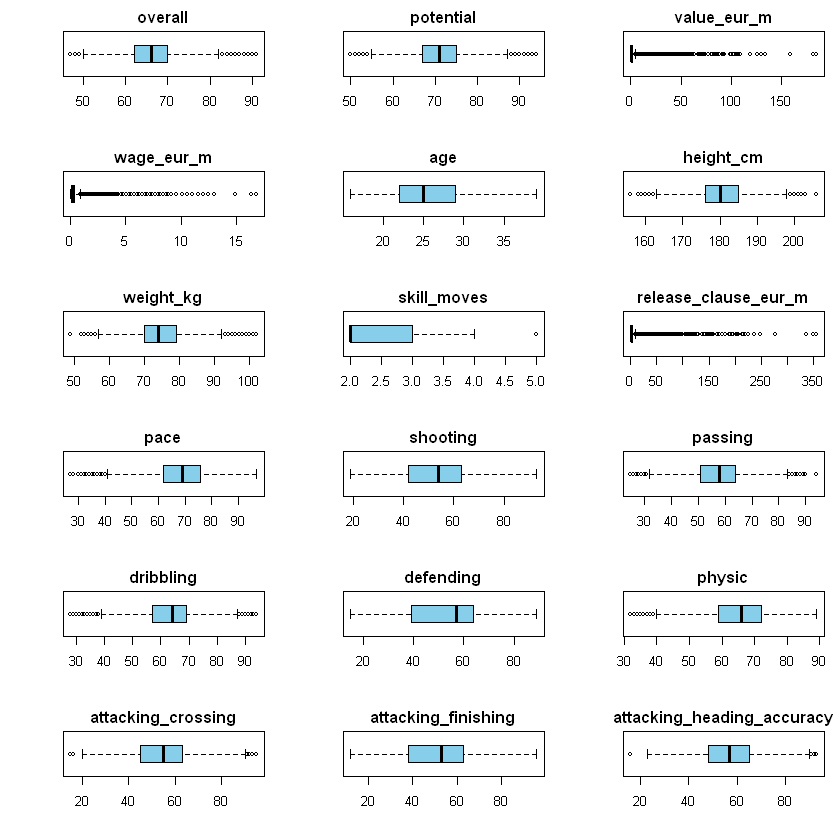

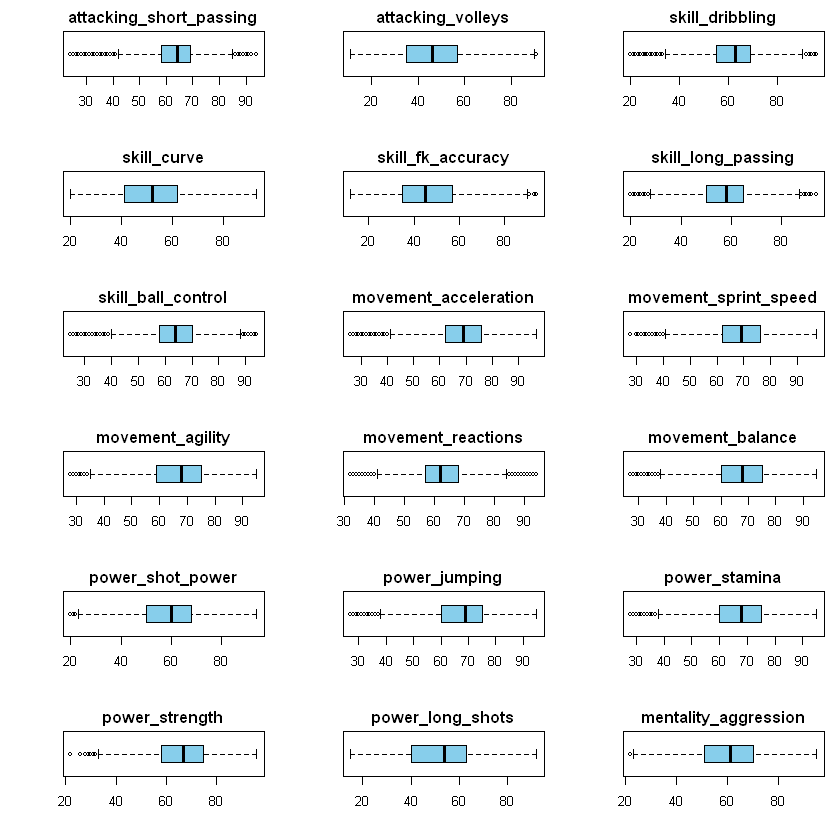

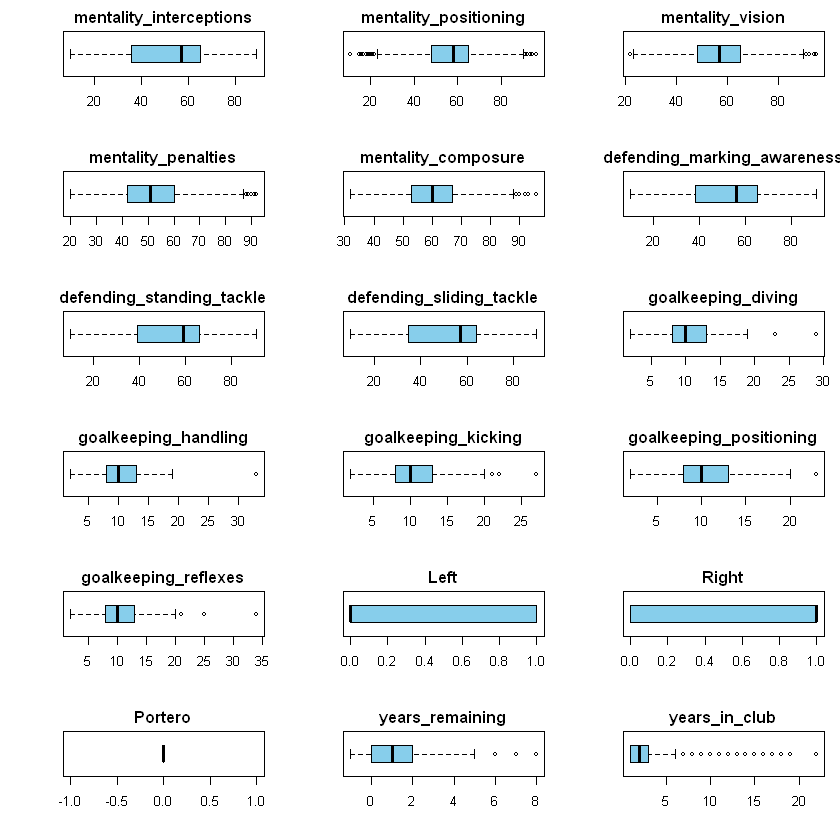

In [126]:
# Detección y tratamiento de outliers
library(dplyr)

num_cols <- names(dplyr::select(df, where(is.numeric)))
cols_to_remove <- c("league_level", "weak_foot", "international_reputation", 
                    "Defensa", "Medio", "Delantero", "is_internacional")

selected_cols <- setdiff(num_cols, cols_to_remove)

selected_num_cols <- df %>% 
  dplyr::select(all_of(selected_cols))

par(mfrow = c(6, 3), mar = c(4, 4, 2, 1))
for (i in 1:length(selected_cols)) {
  boxplot(selected_num_cols[[selected_cols[i]]], 
          main = selected_cols[i], 
          col = "skyblue", 
          border = "black", 
          horizontal = TRUE)
}


In [109]:
# Primero con el df sin missing
df <- read.csv("2_datos_con_dummies_y_missings_eliminados.csv")
dput(names(df))
str(df)

c("overall", "potential", "value_eur_m", "wage_eur_m", "age", 
"height_cm", "weight_kg", "league_level", "club_position", "preferred_foot", 
"weak_foot", "skill_moves", "international_reputation", "work_rate", 
"release_clause_eur_m", "player_traits", "pace", "shooting", 
"passing", "dribbling", "defending", "physic", "attacking_crossing", 
"attacking_finishing", "attacking_heading_accuracy", "attacking_short_passing", 
"attacking_volleys", "skill_dribbling", "skill_curve", "skill_fk_accuracy", 
"skill_long_passing", "skill_ball_control", "movement_acceleration", 
"movement_sprint_speed", "movement_agility", "movement_reactions", 
"movement_balance", "power_shot_power", "power_jumping", "power_stamina", 
"power_strength", "power_long_shots", "mentality_aggression", 
"mentality_interceptions", "mentality_positioning", "mentality_vision", 
"mentality_penalties", "mentality_composure", "defending_marking_awareness", 
"defending_standing_tackle", "defending_sliding_tackle", "goalkeeping_di

In [76]:
head(df)

,overall,potential,value_eur_m,wage_eur_m,age,height_cm,weight_kg,league_level,club_position,preferred_foot,⋯,Left,Right,category,Defensa,Delantero,Medio,Portero,years_remaining,years_in_club,is_internacional
,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,91,94,181.5,11.040,24,182,75,1,LW,Right,⋯,0,1,Delantero,0,1,0,0,0,6,1
2,91,94,185.0,16.320,22,195,94,1,ST,Left,⋯,1,0,Delantero,0,1,0,0,3,2,1
3,91,91,103.0,16.800,32,181,75,1,SUB,Right,⋯,0,1,Delantero,0,1,0,0,1,9,1
4,90,90,41.0,1.104,36,169,67,1,RF,Left,⋯,1,0,Delantero,0,1,0,0,1,1,1
5,90,90,51.0,4.560,35,185,81,1,RS,Right,⋯,0,1,Delantero,0,1,0,0,2,1,0
6,90,90,58.0,16.320,34,185,81,1,ST,Right,⋯,0,1,Delantero,0,1,0,0,2,2,1


In [118]:
x_col <- c("overall", "potential", "value_eur_m", "wage_eur_m", "age", 
              "height_cm", "weight_kg", "league_level", 
              "weak_foot", "skill_moves", "international_reputation",  
              "release_clause_eur_m", "pace", "shooting", 
              "passing", "dribbling", "defending", "physic", "attacking_crossing", 
              "attacking_finishing", "attacking_heading_accuracy", "attacking_short_passing", 
              "attacking_volleys", "skill_dribbling", "skill_curve", "skill_fk_accuracy", 
              "skill_long_passing", "skill_ball_control", "movement_acceleration", 
              "movement_sprint_speed", "movement_agility", "movement_reactions", 
              "movement_balance", "power_shot_power", "power_jumping", "power_stamina", 
              "power_strength", "power_long_shots", "mentality_aggression", 
              "mentality_interceptions", "mentality_positioning", "mentality_vision", 
              "mentality_penalties", "mentality_composure", "defending_marking_awareness", 
              "defending_standing_tackle", "defending_sliding_tackle", "goalkeeping_diving", 
              "goalkeeping_handling", "goalkeeping_kicking", "goalkeeping_positioning", 
              "goalkeeping_reflexes", "Left", "Right", "Defensa", 
              "Delantero", "Medio", "years_remaining", "years_in_club", 
              "is_internacional")

y_col <- c("value_eur_m")

In [119]:
# Correlaciones
correlations <- sapply(x_col, function(x) cor(df[[x]], df[[y_col]]))
correlation_df <- data.frame(Variable = names(correlations), Correlation = correlations)
print(correlation_df)


                                               Variable   Correlation
overall                                         overall  0.5592467638
potential                                     potential  0.5236274912
value_eur_m                                 value_eur_m  1.0000000000
wage_eur_m                                   wage_eur_m  0.8417721447
age                                                 age  0.0302005850
height_cm                                     height_cm  0.0232579677
weight_kg                                     weight_kg  0.0313965996
league_level                               league_level -0.1283604744
weak_foot                                     weak_foot  0.1438915581
skill_moves                                 skill_moves  0.2711715374
international_reputation       international_reputation  0.6643427980
release_clause_eur_m               release_clause_eur_m  0.9951097550
pace                                               pace  0.1810520167
shooting            

In [31]:
set.seed(123456)

x_est = c("overall", "potential", "value_eur_m", "wage_eur_m", "age", 
              "height_cm", "weight_kg", "league_level", 
              "weak_foot", "skill_moves", "international_reputation",  
              "release_clause_eur_m", "pace", "shooting", 
              "passing", "dribbling", "defending", "physic", "attacking_crossing", 
              "attacking_finishing", "attacking_heading_accuracy", "attacking_short_passing", 
              "attacking_volleys", "skill_dribbling", "skill_curve", "skill_fk_accuracy", 
              "skill_long_passing", "skill_ball_control", "movement_acceleration", 
              "movement_sprint_speed", "movement_agility", "movement_reactions", 
              "movement_balance", "power_shot_power", "power_jumping", "power_stamina", 
              "power_strength", "power_long_shots", "mentality_aggression", 
              "mentality_interceptions", "mentality_positioning", "mentality_vision", 
              "mentality_penalties", "mentality_composure", "defending_marking_awareness", 
              "defending_standing_tackle", "defending_sliding_tackle", "goalkeeping_diving", 
              "goalkeeping_handling", "goalkeeping_kicking", "goalkeeping_positioning", 
              "goalkeeping_reflexes",  "years_remaining", "years_in_club")

x_dumm = c("is_internacional", "Left", "Right", "Defensa", "Delantero", "Medio")

# Estandarización
X <- df[, x_est]
y <- df[, y_col]
X_scaled <- scale(X)

# Muestrea
n <- nrow(df)
sample_size <- round(0.3 * n)
sample_indices <- sample(1:n, sample_size)
X_sampled <- X[sample_indices, ]
y_sampled <- y[sample_indices]

X_scaled <- scale(X_sampled[, x_est])

y <- y_sampled

In [157]:
# Columnas numéricas y no numéricas
num_cols <- df %>% select_if(is.numeric) %>% colnames()
cat_cols <- df %>% select_if(is.factor) %>% colnames()
#summary_num <- summary(df[num_cols])

# Obtener los nombres de las columnas numéricas
num_cols <- colnames(df)[sapply(df, is.numeric)]

# Obtener los nombres de las columnas no numéricas (categóricas)
cat_cols <- colnames(df)[sapply(df, function(x) is.factor(x) | is.character(x))]

# Mostrar los nombres de las columnas numéricas y no numéricas
print("Columnas Numéricas:")
print(num_cols)
print("Columnas No Numéricas:")
print(cat_cols)


[1] "Columnas Numéricas:"
 [1] "overall"                     "potential"                  
 [3] "value_eur_m"                 "wage_eur_m"                 
 [5] "age"                         "height_cm"                  
 [7] "weight_kg"                   "league_level"               
 [9] "weak_foot"                   "skill_moves"                
[11] "international_reputation"    "release_clause_eur_m"       
[13] "pace"                        "shooting"                   
[15] "passing"                     "dribbling"                  
[17] "defending"                   "physic"                     
[19] "attacking_crossing"          "attacking_finishing"        
[21] "attacking_heading_accuracy"  "attacking_short_passing"    
[23] "attacking_volleys"           "skill_dribbling"            
[25] "skill_curve"                 "skill_fk_accuracy"          
[27] "skill_long_passing"          "skill_ball_control"         
[29] "movement_acceleration"       "movement_sprint_speed"      

In [27]:
# Interesa saber para el resto de columnas no numéricas, qué valores tienen por si de alguno se pueden crear más dummies
# player_positions no porque se ha utilizado club_position, que tiene valores únicos
# 
cat_cols <- colnames(df)[sapply(df, function(x) is.factor(x) | is.character(x))]

# Lista para almacenar los valores únicos de cada columna
unique_values_list <- list()

for (col in cat_cols) {
  unique_values <- unique(df[[col]])
  unique_values_list[[col]] <- unique_values
}

# Lista de valores únicos para cada columna
print(unique_values_list)


$player_positions
  [1] "ST, LW"        "ST"            "CM, CAM"       "CF, CAM"      
  [5] "CF, ST"        "LW"            "CDM, CM"       "CB"           
  [9] "CDM"           "RW"            "CM, RW"        "CDM, RB, CM"  
 [13] "ST, CF"        "CAM, CM"       "CM, CDM"       "CM"           
 [17] "CAM, CM, LM"   "LW, RW"        "LW, CF, ST"    "CB, RB"       
 [21] "RW, RM"        "RB"            "CF, CAM, ST"   "RW, LW"       
 [25] "RM, RW"        "CF, LM, ST"    "LB"            "RW, LW, ST"   
 [29] "LB, LM"        "LW, LM, ST"    "CF, LW"        "CB, LB"       
 [33] "LW, LM"        "LM, RM"        "CDM, CM, CAM"  "RM, LM"       
 [37] "ST, RM"        "RB, RWB"       "CAM, RM, CM"   "CM, CAM, LM"  
 [41] "ST, RW"        "LM, LW, RW"    "CAM, CF, ST"   "CF, LW, ST"   
 [45] "RM, ST, LM"    "LW, LWB"       "CM, LM"        "LWB, LM"      
 [49] "RM, CM, RB"    "CM, LW"        "RWB, RM"       "CAM, CF"      
 [53] "CAM, CM, CF"   "LM, RM, LW"    "CF, RW, RM"    "CB, LB, RB"   
 [

# <h2 id="seleccion-de-variables" style="font-weight: bold; color: #2F8F9D;">SELECCIÓN DE VARIABLES: MÉTODOS Y SEMILLAS</h2>

In [1]:
# Para el exploratorio 
# https://github.com/coderjolly/football-player-prediction

# Carga de librerías
library(Boruta)
library(caret)
library(corrplot)
library(cowplot)
library(doParallel)
library(dplyr)
library(dummies) 
library(gam)
library(ggplot2)
library(gridExtra)
library(klaR)
library(lubridate)
library(MASS)
library(mlbench)
library(MXM)
library(naniar)
library(parallel)
#library(plyr) similar a dplyr
library(psych)
library(randomForest)
library(reshape2)
library(RColorBrewer)
library(sas7bdat)
library(VIM)

# Directorio de trabajo 
setwd("C:/Users/Vero/Desktop/Machine Learning/1 Futbol")

# Número de núcleos para paralelizar partes del código
cl <- makeCluster(detectCores() - 1) 
registerDoParallel(cl) 

# Carga de datos
df <- read.csv("2_datos_con_dummies_y_missings_eliminados.csv")
dput(names(df))
str(df)

# Lista con todas las variables del dataset sin dummies

lista <- c("overall", "potential", "value_eur_m", "wage_eur_m", "age", 
           "height_cm", "weight_kg", "league_level", "club_position", 
           "weak_foot", "skill_moves", "international_reputation", "work_rate", 
           "release_clause_eur_m", "player_traits", "pace", "shooting", 
           "passing", "dribbling", "defending", "physic", "attacking_crossing", 
           "attacking_finishing", "attacking_heading_accuracy", "attacking_short_passing", 
           "attacking_volleys", "skill_dribbling", "skill_curve", "skill_fk_accuracy", 
           "skill_long_passing", "skill_ball_control", "movement_acceleration", 
           "movement_sprint_speed", "movement_agility", "movement_reactions", 
           "movement_balance", "power_shot_power", "power_jumping", "power_stamina", 
           "power_strength", "power_long_shots", "mentality_aggression", 
           "mentality_interceptions", "mentality_positioning", "mentality_vision", 
           "mentality_penalties", "mentality_composure", "defending_marking_awareness", 
           "defending_standing_tackle", "defending_sliding_tackle", "goalkeeping_diving", 
           "goalkeeping_handling", "goalkeeping_kicking", "goalkeeping_positioning", 
           "goalkeeping_reflexes", "years_remaining", "years_in_club", "preferred_foot", "category", "is_internacional")

base<-df[,lista]

# Selección de las columnas numéricas (NO TARGET)
listconti <- c("overall", "potential", "wage_eur_m", "age", 
              "height_cm", "weight_kg", "league_level", 
              "weak_foot", "skill_moves", "international_reputation",  
              "release_clause_eur_m", "pace", "shooting", 
              "passing", "dribbling", "defending", "physic", "attacking_crossing", 
              "attacking_finishing", "attacking_heading_accuracy", "attacking_short_passing", 
              "attacking_volleys", "skill_dribbling", "skill_curve", "skill_fk_accuracy", 
              "skill_long_passing", "skill_ball_control", "movement_acceleration", 
              "movement_sprint_speed", "movement_agility", "movement_reactions", 
              "movement_balance", "power_shot_power", "power_jumping", "power_stamina", 
              "power_strength", "power_long_shots", "mentality_aggression", 
              "mentality_interceptions", "mentality_positioning", "mentality_vision", 
              "mentality_penalties", "mentality_composure", "defending_marking_awareness", 
              "defending_standing_tackle", "defending_sliding_tackle", "goalkeeping_diving", 
              "goalkeeping_handling", "goalkeeping_kicking", "goalkeeping_positioning", 
              "goalkeeping_reflexes", "years_remaining", "years_in_club")

listclass <- c("category", "preferred_foot", "is_internacional")
vardep <- c("value_eur_m")

# 61 variables

base <- base[,c(listconti,listclass,vardep)]

# Estandarización
means <-apply(base[,listconti],2,mean,na.rm=TRUE)
sds<-sapply(base[,listconti],sd,na.rm=TRUE)

base2<-scale(base[,listconti], center = means, scale = sds)
base<-data.frame(cbind(base2,base[,c(listclass,vardep)]))

str(base)

basebis<-dummy.data.frame(base, listclass, sep = ".")#nuevo dataframe con las dummys

# Matriz para algunas selección de variables:
nombres1 <- c("overall", "potential", "wage_eur_m", "age", 
              "height_cm", "weight_kg", "league_level", 
              "weak_foot", "skill_moves", "international_reputation",  
              "release_clause_eur_m", "pace", "shooting", 
              "passing", "dribbling", "defending", "physic", "attacking_crossing", 
              "attacking_finishing", "attacking_heading_accuracy", "attacking_short_passing", 
              "attacking_volleys", "skill_dribbling", "skill_curve", "skill_fk_accuracy", 
              "skill_long_passing", "skill_ball_control", "movement_acceleration", 
              "movement_sprint_speed", "movement_agility", "movement_reactions", 
              "movement_balance", "power_shot_power", "power_jumping", "power_stamina", 
              "power_strength", "power_long_shots", "mentality_aggression", 
              "mentality_interceptions", "mentality_positioning", "mentality_vision", 
              "mentality_penalties", "mentality_composure", "defending_marking_awareness", 
              "defending_standing_tackle", "defending_sliding_tackle", "goalkeeping_diving", 
              "goalkeeping_handling", "goalkeeping_kicking", "goalkeeping_positioning", 
              "goalkeeping_reflexes", "years_remaining", "years_in_club", "category.Defensa", 
              "category.Delantero", "category.Medio", "preferred_foot.Left", "preferred_foot.Right", 
              "is_internacional.0", "is_internacional.1")

length(nombres1) #60 variables
vardep <- vardep <- c("value_eur_m")

archivo1 <- basebis 
y<-archivo1[,vardep]
x<-archivo1[,nombres1]

# Semilla 1
set.seed(123456)

Loading required package: ggplot2

Loading required package: lattice



corrplot 0.92 loaded

Loading required package: foreach

Loading required package: iterators

Loading required package: parallel


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


dummies-1.5.6 provided by Decision Patterns


Loading required package: splines

Loaded gam 1.22-3



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Loading required package: MASS


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select



Attaching package: 'lubridate'


The following object is masked from 'package:cowplot':

    stamp


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




: 

In [4]:
# Semilla 1
set.seed(123456)

source("funcion steprepetido.R")
source("cruzadas avnnet y lin.R")

In [ ]:
# Selección de variables: método 1 SBF
filtro <- sbf(x, y, sbfControl = sbfControl(functions = rfSBF,method = "cv", verbose = FALSE))
a1 <- dput(filtro$optVariables)
length(a1) #52

variables_a1 <- c("overall", "potential", "wage_eur_m", "age", "weight_kg", "league_level", 
                  "weak_foot", "skill_moves", "international_reputation", "release_clause_eur_m", 
                  "pace", "shooting", "passing", "dribbling", "defending", "physic", 
                  "attacking_crossing", "attacking_finishing", "attacking_heading_accuracy", 
                  "attacking_short_passing", "attacking_volleys", "skill_dribbling", 
                  "skill_curve", "skill_fk_accuracy", "skill_long_passing", "skill_ball_control", 
                  "movement_acceleration", "movement_sprint_speed", "movement_agility", 
                  "movement_reactions", "movement_balance", "power_shot_power", 
                  "power_jumping", "power_stamina", "power_strength", "power_long_shots", 
                  "mentality_aggression", "mentality_interceptions", "mentality_positioning", 
                  "mentality_vision", "mentality_penalties", "mentality_composure", 
                  "defending_marking_awareness", "defending_standing_tackle", "defending_sliding_tackle", 
                  "years_remaining", "years_in_club", "category.Defensa", "category.Delantero", 
                  "category.Medio", "is_internacional.0", "is_internacional.1")

: 

In [5]:
# Selección de variables: método 2 RFE
control_rfe <- rfeControl(functions = rfFuncs, method = "cv", number = 10)
results <- rfe(x, y, sizes = c(1:8), rfeControl = control_rfe)

selecrfe <- results$optVariables
a2 <- dput(results$optVariables)
length(a2) #6

variables_a2 <- c("release_clause_eur_m", "overall", "potential", "age", "wage_eur_m", "movement_reactions")

: 

In [ ]:
# Selección de variables: método 3
full <- glm(value_eur_m~., data=base, family = gaussian(link = "identity"))
null <- glm(value_eur_m~1, data=base, family = gaussian(link = "identity"))

selec1 <- stepAIC(null, scope=list(upper=full), direction="both", family = gaussian(link = "identity"), trace=FALSE)
vec <- (names(selec1[[1]]))
length(vec) #28

a3 <- dput(vec)
variables_a3 <- c("(Intercept)", "release_clause_eur_m", "international_reputation", 
                  "power_stamina", "attacking_volleys", "weight_kg", "potential", 
                  "overall", "age", "is_internacional", "movement_balance", "categoryDelantero", 
                  "category.Medio", "mentality_interceptions", "skill_ball_control", 
                  "years_remaining", "years_in_club", "mentality_penalties", "power_jumping", 
                  "height_cm", "movement_acceleration", "attacking_heading_accuracy", 
                  "power_strength", "skill_dribbling", "dribbling", "league_level", 
                  "skill_fk_accuracy", "skill_curve")


In [ ]:
# Selección de variables: método 4 stepAIC
#ponemos k=log(n) en stepAIC, en este caso n = 15129 observaciones, k = 9.62

full<-glm(value_eur_m~., data=base, family = gaussian(link = "identity"))
null<-glm(value_eur_m~1, data=base, family = gaussian(link = "identity"))

selec1<-stepAIC(null, scope=list(upper=full),
                direction="both", family = gaussian(link = "identity"), trace = FALSE, k = 9.62)

vec<-(names(selec1[[1]]))
length(vec) #15
a4 <- dput(vec)
variables_a4 <- c("release_clause_eur_m", "international_reputation", 
                  "power_stamina", "weight_kg", "potential", "overall", "age", 
                  "is_internacional.1", "movement_balance", "mentality_interceptions", 
                  "years_remaining", "years_in_club", "category.Delantero", "category.Medio")

In [ ]:
# Selección de variables: método 5. BORUTA

# También vale como Filter
out.boruta <- Boruta(value_eur_m~., data = base)
print(out.boruta)
summary(out.boruta)
sal<-data.frame(out.boruta$finalDecision)

sal2<-sal[which(sal$out.boruta.finalDecision=="Confirmed"),,drop=FALSE]
a5 <- dput(row.names(sal2))
length(a5) #31

variables_a5 <- variables_a5 <- c("overall", "potential", "wage_eur_m", "age", "international_reputation", 
                                                       "release_clause_eur_m", "pace", "shooting", "passing", "dribbling", 
                                                       "defending", "physic", "attacking_crossing", "attacking_short_passing", 
                                                       "skill_dribbling", "skill_curve", "skill_fk_accuracy", "skill_long_passing", 
                                                       "skill_ball_control", "movement_acceleration", "movement_sprint_speed", 
                                                       "movement_reactions", "power_stamina", "mentality_interceptions", 
                                                       "mentality_positioning", "mentality_vision", "mentality_composure", 
                                                       "defending_marking_awareness", "defending_standing_tackle", "defending_sliding_tackle", 
                                                       "years_remaining")

In [ ]:
# Selección de variables: método 6. MXM
mmpc1 <- MMPC(vardep, archivo1, max_k = 2, hash = TRUE,test = "testIndFisher")
mmpc1@selectedVars
a6 <- dput(names(archivo1[,c(mmpc1@selectedVars)]))

length(a6) #10
variables_a6 <- c("overall", "wage_eur_m", "skill_moves", "international_reputation", 
                  "release_clause_eur_m", "movement_agility", "power_stamina", 
                  "years_remaining", "is_internacional.0", "is_internacional.1")

In [ ]:
# Selección de variables: método 7
SES1 <- SES(vardep, archivo1, max_k = 3, hash = TRUE,
            test = "testIndFisher")

SES1@selectedVars

dput(names(archivo1[,c(SES1@selectedVars)]))
a7 <-dput(names(archivo1[,c(SES1@selectedVars)]))
length(a7) #6

variables_a7 <- c("overall", "international_reputation", "release_clause_eur_m", 
                  "attacking_volleys", "years_remaining", "is_internacional.1")

In [ ]:
# Selección de variables: método 8
source("funcion steprepetido.R")

lista <- steprepetido(data=archivo1, vardep = c("value_eur_m"),
                    listconti = nombres1, sinicio=12345, sfinal = 12385, porcen = 0.8, criterio="AIC")


tabla <- lista[[1]]
a8 <- dput(lista[[2]][[1]])
length(a8) #27

variables_a8 <- c("release_clause_eur_m", "international_reputation", "attacking_volleys", 
                  "potential", "overall", "age", "is_internacional.1", "weight_kg", 
                  "movement_balance", "category.Delantero", "mentality_interceptions", 
                  "years_remaining", "height_cm", "skill_ball_control", "power_jumping", 
                  "movement_acceleration", "physic", "attacking_heading_accuracy", 
                  "mentality_aggression", "weak_foot", "years_in_club", "skill_dribbling", 
                  "dribbling", "mentality_penalties", "league_level", "category.Defensa", 
                  "mentality_composure")

In [ ]:
# Selección de variables: método 9. STEP REPETIDO BIC
lista <- steprepetido(data=archivo1, vardep=c("value_eur_m"),
                      listconti = nombres1,
                      sinicio=12345, sfinal=12385, porcen = 0.8, criterio="BIC")


tabla<-lista[[1]]
dput(lista[[2]][[1]]) 
variables_9_1 <- c("release_clause_eur_m", "international_reputation", "power_stamina", 
                   "potential", "overall", "age", "weight_kg", "movement_balance", 
                   "category.Delantero", "mentality_interceptions", "is_internacional.0")

length(variables_9_1) #11

dput(lista[[2]][[2]])
variables_9_2 <- c("release_clause_eur_m", "international_reputation", "power_stamina", 
                   "defending_sliding_tackle", "age", "is_internacional.1", "years_remaining", 
                   "years_in_club", "category.Delantero")

length(variables_9_2) #9

In [ ]:
data <- basebis

# PRUEBA CON RFOREST 30 AUNQUE SE PUEDE PROBAR CON BAGGING 
rfgrid<-expand.grid(mtry=c(30))

control<-trainControl(method = "cv",number=4,savePredictions = "all") 

rf<- train(value_eur_m~.,data=data,
           method="rf",trControl=control,tuneGrid=rfgrid,
           linout = T,ntree=1200,nodesize=10,replace=TRUE,
           importance=TRUE)

rf

# CON IMPORTANCIA DE VARIABLES RANDOM FOREST

final<-rf$finalModel

tabla<-as.data.frame(importance(final))
tabla<-tabla[order(-tabla$IncNodePurity),]
tabla

# tabla<-tabla[order(-tabla$"%IncMSE"),]
# tabla

barplot(tabla$IncNodePurity,names.arg=rownames(tabla))

lista<-dput(rownames(tabla))

vardep<-"value_eur_m"

vacio2<-data.frame()

for (i in (2:20))
{
  varis<-lista[1:i]
  data2<-data[,c(varis,vardep)]
  rfgrid<-expand.grid(mtry=c(i))
  
  control<-trainControl(method = "cv", number=5,savePredictions = "all") 
  
  rf<- train(value_eur_m~.,data=data2,
             method="rf",trControl=control,tuneGrid=rfgrid,
             linout = T,ntree=300,nodesize=10,replace=TRUE,
             importance=TRUE)
  
  a<-rf$results$MAE
  vacio <- data.frame(Variables = i, MAE = a)
  vacio2<-rbind(vacio,vacio2)
  
}
vacio2 <- arrange(vacio2, Variables)

ggplot(vacio2,aes(y=MAE, x=Variables))+geom_point()+geom_line()+  
  scale_x_continuous(breaks = vacio2$Variables)+
  scale_y_continuous(breaks = vacio2$MAE) +  labs(title="RANDOM FOREST")


selecrandomforest<-lista[1:6]

dput(selecrandomforest)

# <h2 id="modelos" style="font-weight: bold; color: #2F8F9D; text-transform: uppercase;">Modelización y ajuste de hiperparámetros</h2>

In [1]:
# VALIDACIÓN CRUZADA

source("cruzadas avnnet y lin.R")
data <- basebis

# Variables elegidas en método AIC
medias1<-cruzadalin(data=data,
                    vardep="value_eur_m",listconti=c("release_clause_eur_m", "international_reputation", 
                                                     "power_stamina", "attacking_volleys", "weight_kg", "potential", 
                                                     "overall", "age", "is_internacional.1", "movement_balance", "category.Delantero", 
                                                     "category.Medio", "mentality_interceptions", "skill_ball_control", 
                                                     "years_remaining", "years_in_club", "mentality_penalties", "power_jumping", 
                                                     "height_cm", "movement_acceleration", "attacking_heading_accuracy", 
                                                     "power_strength", "skill_dribbling", "dribbling", "league_level", 
                                                     "skill_fk_accuracy", "skill_curve"),
                    listclass=c(""),grupos=4,sinicio=1234,repe=25)

medias1$modelo="STEPAIC"

ERROR: Error in eval(expr, envir, enclos): objeto 'basebis' no encontrado


In [ ]:
# Variables elegidas en método BIC
medias2<-cruzadalin(data=data,
                    vardep="value_eur_m",listconti=c("release_clause_eur_m", "international_reputation", 
                                                             "power_stamina", "weight_kg", "potential", "overall", "age", 
                                                             "is_internacional.1", "movement_balance", "mentality_interceptions", 
                                                             "years_remaining", "years_in_club", "category.Delantero", "category.Medio"),
                    listclass=c(""),grupos=4,sinicio=1234,repe=25)

medias2$modelo="STEPBIC"

In [ ]:
medias3<-cruzadalin(data=data,
                    vardep="value_eur_m",listconti=c("release_clause_eur_m", "international_reputation", "attacking_volleys", 
                                                              "potential", "overall", "age", "is_internacional.1", "weight_kg", 
                                                              "movement_balance", "category.Delantero", "mentality_interceptions", 
                                                              "years_remaining", "height_cm", "skill_ball_control", "power_jumping", 
                                                              "movement_acceleration", "physic", "attacking_heading_accuracy", 
                                                              "mentality_aggression", "weak_foot", "years_in_club", "skill_dribbling", 
                                                              "dribbling", "mentality_penalties", "league_level", "category.Defensa", 
                                                              "mentality_composure"),
                    listclass=c(""),grupos=4,sinicio=1234,repe=25)

medias3$modelo="STEPrep1"

In [ ]:
medias4<-cruzadalin(data=data,
                    vardep="value_eur_m",listconti=c("release_clause_eur_m", "international_reputation", 
                                                             "power_stamina", "weight_kg", "potential", "overall", "age", 
                                                             "is_internacional.1", "movement_balance", "mentality_interceptions", 
                                                             "years_remaining", "years_in_club", "category.Delantero", "category.Medio"),
                    listclass=c(""),grupos=4,sinicio=1234,repe=25)
medias4$modelo="STEPrep2"

In [ ]:
medias5<-cruzadalin(data=data,
                   vardep="value_eur_m",listconti=c("overall", "potential", "wage_eur_m", "age", "weight_kg", "league_level", 
                                                     "weak_foot", "skill_moves", "international_reputation", "release_clause_eur_m", 
                                                     "pace", "shooting", "passing", "dribbling", "defending", "physic", 
                                                     "attacking_crossing", "attacking_finishing", "attacking_heading_accuracy", 
                                                     "attacking_short_passing", "attacking_volleys", "skill_dribbling", 
                                                     "skill_curve", "skill_fk_accuracy", "skill_long_passing", "skill_ball_control", 
                                                     "movement_acceleration", "movement_sprint_speed", "movement_agility", 
                                                     "movement_reactions", "movement_balance", "power_shot_power", 
                                                     "power_jumping", "power_stamina", "power_strength", "power_long_shots", 
                                                     "mentality_aggression", "mentality_interceptions", "mentality_positioning", 
                                                     "mentality_vision", "mentality_penalties", "mentality_composure", 
                                                     "defending_marking_awareness", "defending_standing_tackle", "defending_sliding_tackle", 
                                                     "years_remaining", "years_in_club", "category.Defensa", "category.Delantero", 
                                                     "category.Medio", "is_internacional.0", "is_internacional.1"),
                   listclass=c(""),grupos=4,sinicio=1234,repe=25)

medias5$modelo="SBF"

In [ ]:
medias6<-cruzadalin(data=data,
                    vardep="value_eur_m",listconti=c("release_clause_eur_m", "overall", "potential", "age", "wage_eur_m", "movement_reactions"),
                    listclass=c(""), grupos=4, sinicio=1234, repe=25)

medias6$modelo="RFE"

In [ ]:
medias7<-cruzadalin(data=data,
                    vardep="value_eur_m",listconti=c("overall", "potential", "wage_eur_m", "age", "international_reputation", 
                                                     "release_clause_eur_m", "pace", "shooting", "passing", "dribbling", 
                                                     "defending", "physic", "attacking_crossing", "attacking_short_passing", 
                                                     "skill_dribbling", "skill_curve", "skill_fk_accuracy", "skill_long_passing", 
                                                     "skill_ball_control", "movement_acceleration", "movement_sprint_speed", 
                                                     "movement_reactions", "power_stamina", "mentality_interceptions", 
                                                     "mentality_positioning", "mentality_vision", "mentality_composure", 
                                                     "defending_marking_awareness", "defending_standing_tackle", "defending_sliding_tackle", 
                                                     "years_remaining"),
                    listclass=c(""),grupos=5,sinicio=1234,repe=25)

medias7$modelo="Boruta"

In [ ]:
medias8<-cruzadalin(data=data,
                    vardep="value_eur_m",listconti=c("overall", "wage_eur_m", "skill_moves", "international_reputation", 
                                                     "release_clause_eur_m", "movement_agility", "power_stamina", 
                                                     "years_remaining", "is_internacional.0", "is_internacional.1"),
                    listclass=c(""),grupos=5,sinicio=1234,repe=25)

medias8$modelo="MXM-1"

In [ ]:
# Union para el boxplot

union1<-rbind(medias1,medias2,medias3,medias4,medias5,medias6,medias7,medias8)
par(cex.axis=0.8, las = 2)
boxplot(data=union1,col="cyan",error~modelo)


union1$error2<-sqrt(union1$error)
par(cex.axis=1.2, las = 2)
boxplot(data=union1,col="cyan",error2~modelo)


In [ ]:
# Validación con la red

# Test con los diferentes conjuntos de variables
# con StepAIC (500 obs / parametro)
# h = 20

stepAIC <- c("release_clause_eur_m", "international_reputation", 
  "power_stamina", "attacking_volleys", "weight_kg", "potential", 
  "overall", "age", "is_internacional.1", "movement_balance", "category.Delantero", 
  "category.Medio", "mentality_interceptions", "skill_ball_control", 
  "years_remaining", "years_in_club", "mentality_penalties", "power_jumping", 
  "height_cm", "movement_acceleration", "attacking_heading_accuracy", 
  "power_strength", "skill_dribbling", "dribbling", "league_level", 
  "skill_fk_accuracy", "skill_curve")

#value_eur_m~release_clause_eur_m+international_reputation+power_stamina+attacking_volleys+weight_kg+potential+overall+age+is_internacional.1+movement_balance+category.Delantero+category.Medio+mentality_interceptions+skill_ball_control+years_remaining+years_in_club+mentality_penalties+power_jumping+height_cm+movement_acceleration+attacking_heading_accuracy+power_strength+skill_dribbling+dribbling+league_level+skill_fk_accuracy+skill_curve

num_cores <- detectCores() - 1
cl <- makeCluster(num_cores)
options(mc.cores = num_cores)
control <- trainControl(method = "cv", number = 7, savePredictions = "all")
avnnetgrid <- expand.grid(size = c(17, 20, 23, 27),
                          decay = c(0.01, 0.1, 0.001), bag = FALSE)

redavnnet <- train(value_eur_m ~ release_clause_eur_m + international_reputation + power_stamina + attacking_volleys + weight_kg + potential + overall + age + is_internacional.1 + movement_balance + category.Delantero + category.Medio + mentality_interceptions + skill_ball_control + years_remaining + years_in_club + mentality_penalties + power_jumping + height_cm + movement_acceleration + attacking_heading_accuracy + power_strength + skill_dribbling + dribbling + league_level + skill_fk_accuracy + skill_curve,
                   data = data, method = "avNNet", linout = TRUE, maxit = 100,
                   trControl = control, tuneGrid = avnnetgrid, repeats = 5, 
                   allowParallel = TRUE)
stopCluster(cl)
redavnnet


In [ ]:
# Resampling: Cross-Validated (7 fold) 
# Summary of sample sizes: 12968, 12969, 12968, 12967, 12968, 12967, ... 
# Resampling results across tuning parameters:
# 
#   size  decay  RMSE      Rsquared   MAE      
#   17    0.001  1.236849  0.9770822  0.3691273
#   17    0.010  1.128893  0.9800349  0.3483474
#   17    0.100  1.219989  0.9772936  0.3704919
#   20    0.001  1.157392  0.9778660  0.3685027
#   20    0.010  1.193045  0.9779097  0.3494402
#   20    0.100  1.151851  0.9791794  0.3545829
#   23    0.001  1.147541  0.9810943  0.3520308
#   23    0.010  1.130553  0.9800053  0.3614498
#   23    0.100  1.136573  0.9801561  0.3582076
#   27    0.001  1.194860  0.9776985  0.3804899
#   27    0.010  1.114979  0.9801026  0.3676952
#   27    0.100  1.169854  0.9782067  0.3721630
# 
# Tuning parameter 'bag' was held constant at a value of FALSE
# RMSE was used to select the optimal model using the smallest value.
# The final values used for the model were size = 33, decay = 0.001 and bag = FALSE.

medias9 <- cruzadaavnnet(data = data,
                         vardep = "value_eur_m",
                         listconti = c("release_clause_eur_m", "international_reputation", 
                                       "power_stamina", "attacking_volleys", "weight_kg", "potential", 
                                       "overall", "age", "is_internacional.1", "movement_balance", "category.Delantero", 
                                       "category.Medio", "mentality_interceptions", "skill_ball_control", 
                                       "years_remaining", "years_in_club", "mentality_penalties", "power_jumping", 
                                       "height_cm", "movement_acceleration", "attacking_heading_accuracy", 
                                       "power_strength", "skill_dribbling", "dribbling", "league_level", 
                                       "skill_fk_accuracy", "skill_curve"),
                         listclass = c(""), 
                         grupos = 10, 
                         sinicio = 1235, 
                         repe = 25, 
                         repeticiones = 5, 
                         itera = 100,
                         size = c(20), 
                         decay = c(0.01))

# Con tamaño 20 y decay 0.01
# size decay   bag     RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD
# 1   20  0.01 FALSE 1.229625 0.9761021 0.4014488 0.5918416 0.01756561 0.04332425

medias9$modelo="r_STEPAIC" # 20 nodos y 27 variables seleccionadas del método AIC

union1<-rbind(medias1,medias2,medias3,medias4,medias5,medias6,medias7,medias8,medias9)

par(cex.axis=0.5, las=2)
boxplot(data=union1,col="cyan",error~modelo)

In [ ]:
# con stepBIC (14 variables)
# El numero de nodos optimo es 34

paste(c("release_clause_eur_m", "international_reputation", 
        "power_stamina", "weight_kg", "potential", "overall", "age", 
        "is_internacional.1", "movement_balance", "mentality_interceptions", 
        "years_remaining", "years_in_club", "category.Delantero", "category.Medio"),collapse = "+")

value_eur_m~release_clause_eur_m+international_reputation+power_stamina+weight_kg+potential+overall+age+is_internacional.1+movement_balance+mentality_interceptions+years_remaining+years_in_club+category.Delantero+category.Medio

control<-trainControl(method = "cv", number = 5, savePredictions = "all") 
set.seed(123)
avnnetgrid <-expand.grid(size=c(28,30,33,34,35),
                         decay=c(0.01,0.1,0.001),bag=FALSE)

redavnnet<- train(value_eur_m~release_clause_eur_m+international_reputation+power_stamina+weight_kg+potential+overall+age+is_internacional.1+movement_balance+mentality_interceptions+years_remaining+years_in_club+category.Delantero+category.Medio,
                  data=data,method="avNNet",linout = TRUE,maxit=100,
                  trControl=control,tuneGrid=avnnetgrid, repeats=5)

redavnnet

In [ ]:
# 15129 samples
# 14 predictor
# 
# No pre-processing
# Resampling: Cross-Validated (5 fold) 
# Summary of sample sizes: 12103, 12103, 12103, 12105, 12102 
# Resampling results across tuning parameters:
#   
#   size  decay  RMSE       Rsquared   MAE      
# 28    0.001  0.8686732  0.9883076  0.2763148
# 28    0.010  0.8787242  0.9878734  0.2713265
# 28    0.100  0.9394300  0.9859383  0.2734086
# 30    0.001  0.8814992  0.9877642  0.2861368
# 30    0.010  0.8787462  0.9884073  0.2676507
# 30    0.100  0.8466426  0.9888089  0.2685555
# 33    0.001  0.8638832  0.9879644  0.2723132
# 33    0.010  0.8882455  0.9875489  0.2707596
# 33    0.100  0.8305828  0.9892712  0.2568360
# 34    0.001  0.9235949  0.9866821  0.2668244
# 34    0.010  0.8509376  0.9885076  0.2734488
# 34    0.100  0.8368521  0.9892319  0.2530016
# 35    0.001  0.8575092  0.9885932  0.2653762
# 35    0.010  0.8301164  0.9891227  0.2712058
# 35    0.100  0.8632437  0.9884798  0.2703303


medias10<-cruzadaavnnet(data=data,
                        vardep="value_eur_m", c("release_clause_eur_m", "international_reputation", 
                                                "power_stamina", "weight_kg", "potential", "overall", "age", 
                                                "is_internacional.1", "movement_balance", "mentality_interceptions", 
                                                "years_remaining", "years_in_club", "category.Delantero", "category.Medio"),
                        listclass=c(""),grupos=10,sinicio=1235,repe=25,repeticiones=5,itera=100,
                        size=c(33),decay=c(0.1))

medias10$modelo="r_STEPBIC" #33 nodos y variables seleccionadas con STEPBIC

# size decay   bag      RMSE  Rsquared      MAE    RMSESD RsquaredSD      MAESD
# 1   33   0.1 FALSE 0.9827395 0.9850804 0.316356 0.4863367 0.01087616 0.03164791

union1<-rbind(medias1,medias2,medias3,medias4,medias5,medias6,medias7,medias8,medias9,medias10)

par(cex.axis=0.5, las=2)
boxplot(data=union1,col="cyan",error~modelo)

In [ ]:
# Red con STEP REPETIDO1

#probemos con el set de variables de steprep1 (9 variables)
# Número de nodos 51

paste(c("release_clause_eur_m", "international_reputation", "power_stamina", 
        "defending_sliding_tackle", "age", "is_internacional.1", "years_remaining", 
        "years_in_club", "category.Delantero"),collapse = "+")

value_eur_m~release_clause_eur_m + international_reputation + power_stamina + defending_sliding_tackle + age + is_internacional.1 + years_remaining + years_in_club + category.Delantero

control<-trainControl(method = "cv",number=5,savePredictions = "all") 
set.seed(123)
avnnetgrid <-expand.grid(size=c(47, 49, 51),
                         decay=c(0.01,0.1,0.001),bag=FALSE)
redavnnet<- train(value_eur_m~release_clause_eur_m + international_reputation + power_stamina + defending_sliding_tackle + age + is_internacional.1 + years_remaining + years_in_club + category.Delantero,
                  data=data,method="avNNet",linout = TRUE,maxit=100,
                  trControl=control,tuneGrid=avnnetgrid, repeats=5)

redavnnet

# 15129 samples
# 9 predictor
# 
# No pre-processing
# Resampling: Cross-Validated (5 fold) 
# Summary of sample sizes: 12103, 12103, 12103, 12105, 12102 
# Resampling results across tuning parameters:
#   
# size  decay  RMSE       Rsquared   MAE      
# 47    0.001  0.9173642  0.9870806  0.3197883
# 47    0.010  0.8878302  0.9880077  0.3130992
# 47    0.100  0.9226121  0.9869393  0.3193348
# 49    0.001  0.8682853  0.9884530  0.3122436
# 49    0.010  0.8744016  0.9880053  0.3120502
# 49    0.100  0.8920008  0.9876894  0.3197015
# 51    0.001  0.8669497  0.9885350  0.3110278
# 51    0.010  0.8751612  0.9880865  0.3061546
# 51    0.100  0.8917000  0.9876773  0.3103530
# 
# Tuning parameter 'bag' was held constant at a value of FALSE
# RMSE was used to select the optimal model using the smallest value.
# The final values used for the model were size = 51, decay = 0.001 and bag = FALSE.

In [ ]:
medias11<-cruzadaavnnet(data=data,
                        vardep="value_eur_m",listconti=c("release_clause_eur_m", "international_reputation", "power_stamina", 
                                                         "defending_sliding_tackle", "age", "is_internacional.1", "years_remaining", 
                                                         "years_in_club", "category.Delantero"),
                        listclass=c(""),grupos=10,sinicio=1235,repe=25,repeticiones=5,itera=100,
                        size=c(51),decay=c(0.001))

medias11$modelo="r_SETPrep1" #51 nodos y variables seleccionadas con STEPrep1

union1<-rbind(medias1,medias2,medias3,medias4,medias5,medias6,medias7,medias8,medias9,medias10,medias11)

par(cex.axis=0.5, las=2)
boxplot(data=union1,col="cyan",error~modelo)


In [32]:
variables_rf <- c("release_clause_eur_m", "overall", "potential", "wage_eur_m", "movement_reactions", "skill_ball_control", "dribbling")
paste(c("release_clause_eur_m", "overall", "potential", "wage_eur_m", "movement_reactions", "skill_ball_control", "dribbling"), collapse = " + ")

# Lineal con random_forest seleccion de variables
medias12 <-cruzadalin(data=data,
                    vardep="value_eur_m",listconti=variables_rf,
                    listclass=c(""), grupos=5, sinicio=1234, repe=25)

medias12$modelo="rf_lineal"

# intercept      RMSE  Rsquared       MAE     RMSESD  RsquaredSD      MAESD
# 1      TRUE 0.7695829 0.9905504 0.3050161 0.06350201 0.001565473 0.01081121

par(cex.axis=0.5, las=2)
boxplot(data=union1,col="cyan",error~modelo)

ERROR: Error in cruzadalin(data = data, vardep = "value_eur_m", listconti = variables_rf, : no se pudo encontrar la función "cruzadalin"


In [ ]:
# Red con random_forest selección de variables
# Tenemos 7, por lo que 55 nodos 

control<-trainControl(method = "cv", number = 5, savePredictions = "all") 
set.seed(123)
avnnetgrid <-expand.grid(size=c(50,53,55),
                         decay=c(0.01,0.1,0.001),bag=FALSE)

redavnnet<- train(value_eur_m~release_clause_eur_m + overall + potential + wage_eur_m + movement_reactions + skill_ball_control + dribbling,
                  data=data,method="avNNet",linout = TRUE,maxit=100,
                  trControl=control,tuneGrid=avnnetgrid, repeats=5)

redavnnet

# No pre-processing
# Resampling: Cross-Validated (5 fold) 
# Summary of sample sizes: 12103, 12103, 12103, 12105, 12102 
# Resampling results across tuning parameters:
#   
#   size  decay  RMSE       Rsquared   MAE      
# 50    0.001  0.8243731  0.9892473  0.2882539
# 50    0.010  0.8026913  0.9896105  0.2799236
# 50    0.100  0.8204958  0.9894691  0.2830196
# 53    0.001  0.7955433  0.9901710  0.2694608
# 53    0.010  0.7936490  0.9898855  0.2785512
# 53    0.100  0.8011976  0.9899335  0.2814378
# 55    0.001  0.8155388  0.9895300  0.2793368
# 55    0.010  0.8457206  0.9888434  0.2820743
# 55    0.100  0.8113262  0.9895722  0.2684836
# 
# Tuning parameter 'bag' was held constant at a value of FALSE
# RMSE was used to select the optimal model using the smallest value.
# The final values used for the model were size = 53, decay = 0.01 and bag = FALSE.

In [ ]:
medias13<-cruzadaavnnet(data=data,
                        vardep="value_eur_m",listconti=variables_rf,
                        listclass=c(""),grupos=4,sinicio=1234,repe=25, size=c(53),decay=c(0.01),repeticiones=5,itera=1000)


medias13$modelo="rf_red"

union1<-rbind(medias1,medias2,medias3,medias4,medias5,medias6,medias7,medias8,medias9,medias10,medias11, medias12, medias13)
par(cex.axis=0.5, las=2)
boxplot(data=union1,col="cyan",error~modelo)

# <h2 id="conclusiones" style="font-weight: bold; color: #2F8F9D;">RESULTADOS Y CONCLUSIONES</h2>

In [ ]:
# Código...